## Informacion
**Clase:** Redes Neuronales Artificiales

**Nombre:** Alejandro Duque

**Fecha:** 25/09/2021

In [44]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt

## Modelo General

In [45]:
# Modelo general de red neuronal
class ModeloGeneral:
    # Modelo que recibe en su constructor:
    # Función de salida: fOutput(X, W)
    # Funcion de perdida: fPerdida(Y, Yt), 
    # Gradiente de la funcion de perdida: gradiente(X, Y, Yt, W)
    def __init__(self, fOutput, fPerdida, gradiente):
        self.fOutput = fOutput
        self.fPerdida = fPerdida
        self.gradiente = gradiente
        
    # Funciones de perdida comunes
    def squareLoss(Y, Yt):
        return(np.sum((Y-Yt)**2))
    
    # Funciones de activacion comunes
    def sigma(Z):
        return(1/(1+np.exp(-Z)))
        
    # Ejecuta descenso del gradiente y grafica los resultados
    def correrModelo(self, X, Y, numParam, nmax = 1000, step = 0.001, perdida=False):
        W, Yt, Loss = self.descensoGrad(X, Y, numParam, nmax, step)
        if(perdida):
            self.graficarPerdida(Loss)    
        return(W, Yt)
    
    # Ajusta los parametros del modelo mediante descenso de gradiente
    def descensoGrad(self, X, Y, numParam, nmax, step=0.001, tolerancia=10**-8):
        # Inicializo parametros
        W = np.random.random(numParam)/10
        Loss = np.zeros(nmax)
        # Ciclo de busqueda
        for i in range(nmax) :
            Yt = self.fOutput(X, W)
            Loss[i] = self.fPerdida(Y, Yt)
            grad = self.gradiente(X,Y,Yt,W)
            W = W - step *  grad
            if(i!=0 and (Loss[i-1]-Loss[i]<tolerancia)):
                break;
        Yt = self.fOutput(X,W)
        return(W, Yt, Loss)
        
    # Grafica la evolucion de la perdida con cada iteracion
    def graficarPerdida(self, Loss):
        plt.figure()
        iteracion = range(len(Loss))
        plt.plot(iteracion, Loss)
        plt.xlabel("Numero de iteracion")
        plt.ylabel("Perdida")
        
    # Clasifica nuevos individuos en un modelo logistico 
    def clasificar(self, X, W):
        return np.round((self.fOutput(X,W)))
        

# Ejercicio 1

## Calculo del gradiente

Se busca ajustar un polinomio arbitrario de grado n a un conjunto de m pares de datos $\{(x_1, y_1), (x_2, y_2), \dotsc (x_m, y_m)\}$
$$
\hat{y} = a_0 + a_1x + \dotsc + a_n x^n
$$

La función de pérdida es:
$$
P = \sum_{j=0}^{m}(y_j - \hat{y_j})^2
$$

El gradiente de la función de pérdida es 
$$
\nabla P = \left[ \frac{\partial P}{\partial a_0}, \frac{\partial P}{\partial a_2}, \dotsc,  \frac{\partial P}{\partial a_n}\right]
$$

Cada derivada parcial se calcula como:
$$
    \frac{\partial P}{\partial a_i} = \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial a_i}
        = \sum_{j=0}^{m} \left( -2(y_j - \hat{y_j}) (x^i) \right)
$$

## Codigo

In [46]:
# Output de la red al ajustar un polinomio de grado arbitrario
def fPoly(X, W):
    # Calculo Yt
    Yt = np.matmul(W, X[:,:])
    return Yt

# Gradiente de la función de pérdida de distancia cuadrática
# al ajustar un polinomio de grado arbitrario
def gradPoly(X, Y, Yt, W):
    grado = len(X[:,0])
    del_PYt = -2 * (Y - Yt)
    grad = np.zeros(grado)
    for i in range(grado):
        grad[i] = sum(del_PYt * X[i,:])
    return grad

# Genero un tensor de estimulos (x^0, x^1, ... x^n) dado un vector x
def tensorPoly(x, grado):
    grado = grado + 1
    # Inicializo el tensor de estimulos
    X = np.ones((grado,len(x)))
    for i in range(grado):
        X[i,:] = x**i
    return(X)


# Creo el modelo polinomial    
modeloPoly = ModeloGeneral(fPoly, ModeloGeneral.squareLoss, gradPoly)

# Ejercicio 2

Coeficientes del polinomio de grado 2: [-0.495 -0.42   0.151]
Coeficientes del polinomio de grado 3: [-0.086 -0.087 -0.188  0.049]
Coeficientes del polinomio de grado 4: [ 0.055  0.052 -0.006 -0.074  0.015]
Coeficientes del polinomio de grado 5: [ 0.036  0.021  0.068 -0.029 -0.01   0.003]
Coeficientes del polinomio de grado 6: [ 0.078  0.047  0.07   0.035  0.002 -0.009  0.001]
Coeficientes del polinomio de grado 7: [ 0.091  0.003  0.046  0.044  0.004  0.002 -0.001  0.   ]


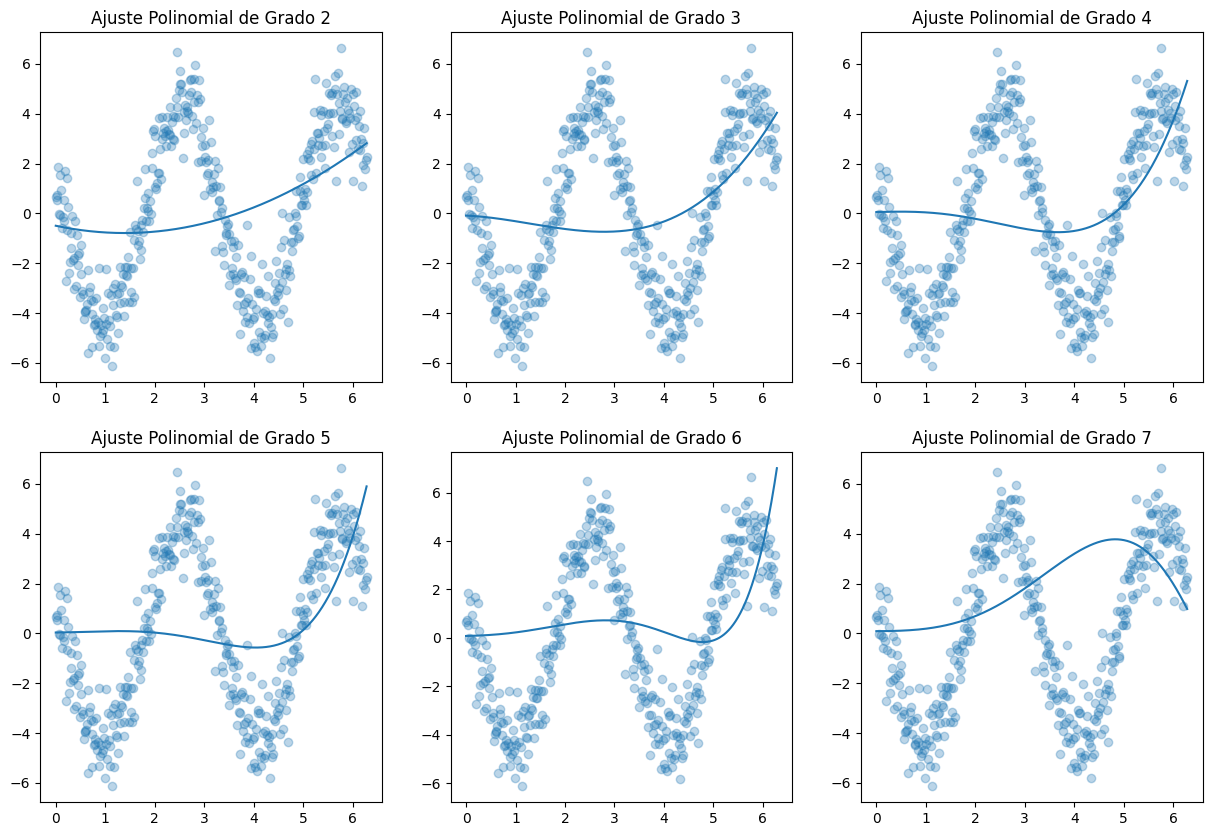

In [47]:
# Cargo los datos
data = pd.read_csv("./data/nolineal.csv")
x = data["x"]
Y = data["y"]

# Genero los distintos ajustes polinomiales de grado n = 2, 3,..., 7
alpha = [10**-6, 2*10**-7, 8*10**-9, 2*10**-10, 8*10**-12, 2.25*10**-13]
nmax = [2000, 4000, 6000, 8000, 10000, 12000]

plt.subplots(3,3,figsize=(15,10))
for i in range(2, 8):
    X = tensorPoly(x, grado = i)
    plt.subplot(2,3,i-1)
    plt.title(f'Ajuste Polinomial de Grado {i}')
    (param, Yt) = modeloPoly.correrModelo(X, Y, numParam = i+1, nmax = nmax[i-2], 
                                          step= alpha[i-2])
    plt.scatter(x, Y, alpha = 0.3)
    plt.plot(x, Yt)
    
    
    print(f'Coeficientes del polinomio de grado {i}: {np.round(param, 3)}')


Cuando se incrementa el grado del polinomio se le otorga mayor flexibilidad al modelo y se espera que logre capturar de mejor forma los patrones no lineales dentro de los datos. Aún así, en este ejercicio no se logró que los parámetros del modelo convergan hacia el óptimo devido a problemas relacionados a la explosión y desvanecimiento del gradiente. La explicación de este problema es que cuando se trabaja con polinomios de grado mayor la magnitud del gradiente también se incrementa, por lo que hay que disminuir el valor alpha de escalamiento del gradiente. Sin embargo, al hacer esto lo que ocurre es que las actualizaciones en los parámetros son tan pequeñas que el modelo no llega a ajustarse aunque se incremente el número de iteraciones.

# Ejercicio 3

## Generación de variables 'dummies'

In [48]:
# Cargo los datos
dataTribus = pd.read_csv("./data/Tribus.csv")

# Creo el tensor de estimulos
X = np.ones((3,len(dataTribus)))
X[1,:] = dataTribus['Loc1']
X[2,:] = dataTribus['Loc2']

# Salida/Variables 'dummies'
YEn = np.array((dataTribus["Tribu"] == "Enano"))*1
YE = np.array((dataTribus["Tribu"] == "Elfo")) * 1
YT = np.array((dataTribus["Tribu"] == "Trol")) * 1

## Modelos Logisticos de una sola neurona

In [49]:
# Funcion output del modelo logistico
def fLog(X, W):
    Z = np.matmul(W, X)
    Yt = 1/(1+np.exp(-Z))
    return Yt

# Gradiente de la perdida del modelo logistico
def gradLog(X, Y, Yt, W):
    # Se calculan derivadas parciales usando la regla de la cadena
    del_py = -2 * (Y - Yt)
    Z = np.matmul(W, X)
    del_yz = np.exp(-Z) / ((1 + np.exp(-Z))**2)
    del_zw = np.transpose(X)
    del_pw = np.matmul(del_py * del_yz, del_zw)
    return(del_pw)    
    
# Evalua la clasificacion del modelo logistico
def testClasificacion(Y, Yt):
    correctos = np.sum(Y == np.round(Yt))
    porcentaje = np.round(correctos / len(Y) * 100, 2)
    print(f'Se clasificaron bien {correctos} de las {len(Y)} instancias')
    print(f'Porcentaje de instancias bien clasificadas: {porcentaje}%\n')
    
modeloLog = ModeloGeneral(fLog, ModeloGeneral.squareLoss, gradLog)

In [50]:
labels = ["Enanos", "Elfos", "Trol"]
Yj = np.array([YEn, YE, YT])

# Ejecuta tres modelos distintos para cada label de salida
for i in range(3):
    W, Yt = modeloLog.correrModelo(X, Yj[i], 3)
    print(f'Parametros del clasificador de {labels[i]}: {W}')
    testClasificacion(Yj[i], Yt)

Parametros del clasificador de Enanos: [ 0.65972188 -1.76635393  0.68707174]
Se clasificaron bien 600 de las 600 instancias
Porcentaje de instancias bien clasificadas: 100.0%

Parametros del clasificador de Elfos: [-2.23007826  0.28264018 -1.39482399]
Se clasificaron bien 600 de las 600 instancias
Porcentaje de instancias bien clasificadas: 100.0%

Parametros del clasificador de Trol: [-4.38994434  0.92380906  0.69674842]
Se clasificaron bien 596 de las 600 instancias
Porcentaje de instancias bien clasificadas: 99.33%



## Modelo logistico combinado

<img src="ej04.png">

## Funcion de pérdida del modelo logístico combinado

### Calculo del gradiente

La función de pérdida es 
$$
P = \frac{1}{k+1} \sum_{j=0}^{k}(Y_j - \bar{Y_j})^2
$$
Donde k es el número total de individuos, y:

$$
Y_j = [Y_{En_j}, Y_{E_j}, Y_{T_j}] \\
\bar{Y_j} = [\bar{Y_{0_j}}, \bar{Y_{1_j}}, \bar{Y_{2_j}}]
$$

El gradiente de la funcion de perdida es
$$
\nabla P = \left[ \frac{\partial P}{\partial \omega_{00}}, \frac{\partial P}{\partial \omega_{01}}, 
                  \frac{\partial P}{\partial \omega_{02}}, \frac{\partial P}{\partial \omega_{10}}, 
                  \frac{\partial P}{\partial \omega_{11}}, \frac{\partial P}{\partial \omega_{12}}, 
                  \frac{\partial P}{\partial \omega_{20}}, \frac{\partial P}{\partial \omega_{21}}, 
                  \frac{\partial P}{\partial \omega_{22}} \right]
$$

Se puede reescribir la función de pérdida como:
$$
P = \frac{1}{k+1} \sum_{j=0}^{k} \left( (Y_{En_j}-\bar{Y_{0j}})^2 + (Y_{E_j}-\bar{Y_{1j}})^2 + (Y_{T_j} - \bar{Y_{2j}})^2 \right)
$$


Cada uno de los pesos influye en el resultado de los nodos de respuesta, por lo que para calcular las derivadas parciales primero se aplica la regla de la cadena multivariable. De forma general cada derivada parcial se verá de la forma:
$$
\frac{\partial P}{\partial \omega_{st}} = 
\frac{\partial P}{\partial \bar{Y_0}} \frac{\partial \bar{Y_0}}{\partial \sigma(z_s)} \frac{\partial \sigma(z_s)}{\partial z_s} \frac{\partial z_s}{\partial \omega_{st}} + 
\frac{\partial P}{\partial \bar{Y_1}} \frac{\partial \bar{Y_1}}{\partial \sigma(z_s)} \frac{\partial \sigma(z_s)}{\partial z_s} \frac{\partial z_s}{\partial \omega_{st}} +
\frac{\partial P}{\partial \bar{Y_2}} \frac{\partial \bar{Y_2}}{\partial \sigma(z_s)} \frac{\partial \sigma(z_s)}{\partial z_s} \frac{\partial z_s}{\partial \omega_{st}}
$$
<br><br><br>

Se desarrolla para cuando $\omega_{st} = \omega_{00}$ y se asume que el numero de individuos es uno solo.

Se calcula el primer término
$$
\frac{\partial P}{\partial \bar{Y_0}} \frac{\partial \bar{Y_0}}{\partial \sigma(z_0)} \frac{\partial \sigma(z_0)}{\partial z_0} \frac{\partial z_0}{\partial \omega_{00}}
$$

Función de pérdida
$$
\frac{\partial P}{\partial \bar{Y_0}} = -2(Y_{En} - \bar{Y_{0}})
$$

Predicción del modelo en $\bar{Y_0}$   
$$
\begin{split}
    \bar{Y_0} &= \frac{\sigma(z_{0})}{\sum_i{\sigma(z_i)}} = \frac{\sigma(z_{0})}{\sigma(z_0) + \sigma(z_1) + \sigma(z_2)} \\
    \frac{\partial \bar{Y_0}}{\partial \sigma(z_0)} &= \frac{\sigma(z_1)+\sigma(z_2)}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2} \\
\end{split}
$$ 

Función de activación 
$$
\begin{split}
    \sigma(z_0) &= \frac{1}{1+e^{-z_0}} \\
    \frac{\partial \sigma(z_0)}{\partial z_0} &= \frac{e^{-z_0}}{(1+e^{-z_0})^2} \\
    \frac{\partial \sigma(z_0)}{\partial z_0} &= \frac{1}{(1+e^{-z_0})} \frac{e^{-z_0}}{(1+e^{-z_0})} \\
    \frac{\partial \sigma(z_0)}{\partial z_0} &= \sigma(z_0)(1 - \sigma(z_0)) \\
\end{split}
$$ 

Capacidad de Interpretación 
$$
\begin{split}
    z_0 &= \omega_{00} + \omega_{01}x_1 + \omega_{02}x_2 \\
    \frac{\partial z_0}{\partial \omega_{00}} &= 1 \\
\end{split}
$$ 

Por lo tanto
$$
\frac{\partial P}{\partial \bar{Y_0}} \frac{\partial \bar{Y_0}}{\partial \sigma(z_0)} \frac{\partial \sigma(z_0)}{\partial z_0} \frac{\partial z_0}{\partial \omega_{00}}
= -2(Y_{En} - \bar{Y_{0}}) \cdot \frac{\sigma(z_1)+\sigma(z_2)}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2} \cdot \sigma(z_0)(1 - \sigma(z_0))
$$
<br><br><br>

Se calcula el segundo término
$$
\frac{\partial P}{\partial \bar{Y_1}} \frac{\partial \bar{Y_1}}{\partial \sigma(z_0)} \frac{\partial \sigma(z_0)}{\partial z_0} \frac{\partial z_0}{\partial \omega_{00}}
$$

Función de pérdida
$$
\frac{\partial P}{\partial \bar{Y_1}} = -2(Y_{E} - \bar{Y_{1}})
$$

Predicción del modelo en $\bar{Y_1}$   
$$
\begin{split}
    \bar{Y_1} &= \frac{\sigma(z_{1})}{\sum_i{\sigma(z_i)}} = \frac{\sigma(z_{1})}{\sigma(z_0) + \sigma(z_1) + \sigma(z_2)} \\
    \frac{\partial \bar{Y_1}}{\partial \sigma(z_0)} &= -\frac{\sigma(z_1)}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2} \\
\end{split}
$$ 

Las derivadas de la  de interpretación y de la función de activación son las mismas. Por lo tanto:
$$
\frac{\partial P}{\partial \bar{Y_1}} \frac{\partial \bar{Y_1}}{\partial \sigma(z_0)} \frac{\partial \sigma(z_0)}{\partial z_0} \frac{\partial z_0}{\partial \omega_{00}}
= -2(Y_{E} - \bar{Y_1}) \cdot -\frac{\sigma(z_1)}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2} \cdot \sigma(z_0)(1 - \sigma(z_0))
$$
<br><br><br>

Se calcula el tercer término
$$
\frac{\partial P}{\partial \bar{Y_2}} \frac{\partial \bar{Y_2}}{\partial \sigma(z_0)} \frac{\partial \sigma(z_0)}{\partial z_0} \frac{\partial z_0}{\partial \omega_{00}}
$$

Función de pérdida
$$
\frac{\partial P}{\partial \bar{Y_2}} = -2(Y_{T} - \bar{Y_{2}})
$$

Predicción del modelo en $\bar{Y_2}$   
$$
\begin{split}
    \bar{Y_2} &= \frac{\sigma(z_2)}{\sum_i{\sigma(z_i)}} = \frac{\sigma(z_2)}{\sigma(z_0) + \sigma(z_1) + \sigma(z_2)} \\
    \frac{\partial \bar{Y_2}}{\partial \sigma(z_0)} &= -\frac{\sigma(z_2)}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2} \\
\end{split}
$$ 

Las derivadas de la capacidad de interpretación y de la función de activación son las mismas. Por lo tanto
$$
\frac{\partial P}{\partial \bar{Y_2}} \frac{\partial \bar{Y_2}}{\partial \sigma(z_0)} \frac{\partial \sigma(z_0)}{\partial z_0} \frac{\partial z_0}{\partial \omega_{00}}
= -2(Y_{T} - \bar{Y_2}) \cdot -\frac{\sigma(z_2)}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2} \cdot \sigma(z_0)(1 - \sigma(z_0))
$$
<br><br><br>

Finalmente, la derivada parcial de la función de pérdida con respecto al primer peso es:
$$
\frac{\partial P}{\partial \omega_{00}} = 
\frac{-2\sigma(z_0)(1 - \sigma(z_0))}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2} \cdot \left(
(\sigma(z_1)+\sigma(z_2))(Y_{En} - \bar{Y_0}) - \sigma(z_1)(Y_{E} - \bar{Y_1}) -\sigma(z_2)(Y_{T} - \bar{Y_2})
\right) \\
$$

Se define a $\xi(x)$ de la siguiente forma:
$$
\xi(x) = \frac{-2\sigma(x)(1 - \sigma(x))}{(\sigma(z_0)+\sigma(z_1)+\sigma(z_2))^2}
$$

Usando notación de vector y la recién definida función $\xi(x)$ se puede reescribir la derivada parcial con respecto al primer peso como:
$$
\frac{\partial P}{\partial \omega_{00}} = 
\xi(z_0)
\begin{bmatrix}
    \sigma(z_1)+\sigma(z_2) \\
    -\sigma(z_1) \\
    -\sigma(z_2)
\end{bmatrix}
\cdot
(Y_j - \bar{Y_j})
$$

<br><br><br>

De la misma forma se puede calcular la derivada con respecto a cada uno de los pesos.

Cuando el peso es de la forma $\omega_{ij}$ la derivada parcial con respecto a dicho peso es la misma a la derivada con respecto a $\omega_{i0}$ multiplicada por un factor de $x_j$, dado que al aplicar la regla de la cadena el único cambio en los cálculos es la derivada de $z_j$ con respecto al peso. Es decir la derivada $\frac{\partial zi}{\partial w_{ij}}$) será $x_j$ en lugar de 1. Por lo tanto:

$$
\begin{split}
    \frac{\partial P}{\partial \omega_{00}} &= 
    \xi(z_0)
    \begin{bmatrix}
        \sigma(z_1)+\sigma(z_2) \\
        -\sigma(z_1) \\
        -\sigma(z_2)
    \end{bmatrix}
    \cdot
    (Y_j - \bar{Y_j}) 
    \\  
    \frac{\partial P}{\partial \omega_{01}} &= 
    \frac{\partial P}{\partial \omega_{00}} x_1
    \\
    \frac{\partial P}{\partial \omega_{02}} &= 
    \frac{\partial P}{\partial \omega_{00}} x_2
\end{split}
$$

En el caso de pasar a un peso que conecte a otro $z_j$, lo que cambia en los cálculos es la derivada de $Y_k$, k = {0,1,2} con respecto a $\sigma(z_j)$, y la de $\sigma(z_j)$ con respecto a $z_j$, es decir las derivada $\frac{\partial Y_k}{\partial \sigma(z_j)}$, $\frac{\partial \sigma(z_j)}{\partial z_j}$. Al hacer dicho cambio, y considerando lo explicado anteriormente se obtienen las derivadas parciales con respecto a los pesos $\omega_{1j}$:
$$
\begin{split}
    \frac{\partial P}{\partial \omega_{10}} &= 
    \xi(z_1)
    \begin{bmatrix}
        -\sigma(z_0) \\
        \sigma(z_0)+\sigma(z_2) \\
        -\sigma(z_2)
    \end{bmatrix}
    \cdot
    (Y_j - \bar{Y_j}) 
    \\  
    \frac{\partial P}{\partial \omega_{11}} &= 
    \frac{\partial P}{\partial \omega_{10}} x_1
    \\
    \frac{\partial P}{\partial \omega_{12}} &= 
    \frac{\partial P}{\partial \omega_{10}} x_2
\end{split}
$$

Repitiendo el mismo procedimiento se obtienen las derivadas con respecto a los pesos $\omega_{2j}$

$$
\begin{split}
    \frac{\partial P}{\partial \omega_{20}} &= 
    \xi(z_2)
    \begin{bmatrix}
        -\sigma(z_0) \\
        -\sigma(z_1) \\
        \sigma(z_0)+\sigma(z_1) \\
    \end{bmatrix}
    \cdot
    (Y_j - \bar{Y_j}) 
    \\  
    \frac{\partial P}{\partial \omega_{21}} &= 
    \frac{\partial P}{\partial \omega_{20}} x_1
    \\
    \frac{\partial P}{\partial \omega_{22}} &= 
    \frac{\partial P}{\partial \omega_{20}} x_2
\end{split}
$$

Cuando el número de individuos es distinto a 1, lo único que cambia es que el gradiente con respecto a un peso necesita considerar la sumatoria de las derivadas parciales con respecto a ese peso de todos los individuos y se multiplica por el factor $\frac{1}{k+1}$

### Implementacion en codigo

In [51]:
# Funcion output del modelo logistico
def fMultiLog(X, W):
    Z = np.matmul(W, X)
    Yt = (1/(1+np.exp(-Z))) / sum(1/(1+np.exp(-Z)))
    return(Yt)

# Función de pérdida del promedio cuadrático.
def fSquareAvgLoss(Y,Yt):
    k = len(Y)
    return 1/(k+1) * np.sum((Y-Yt)**2)


# Gradiente de la perdida del clasificador multiple
def gradMultiLog(X, Y, Yt, W):
    # Funcion de activacion
    def sigma(Z):
        return(ModeloGeneral.sigma(Z))
    
    def xi(X, Z):
        return ((-2 * sigma(X)*(1 - sigma(X))) / (sigma(Z[0]) + sigma(Z[1]) + sigma(Z[2]))**2)
    
    # Derivadas parciales con respecto a wij
    def partialWij(i, sigmaVec, Ydiff):
        dPwij = xi(Z[i], Z) * np.sum(Ydiff * sigmaVec , axis=0)
        dPwi0 = sum(dPwij * X[0])
        dPwi1 = sum(dPwij * X[1])
        dPwi2 = sum(dPwij * X[2])
        return(np.array([dPwi0, dPwi1, dPwi2]))
    
    Ydiff = Y - Yt
    Z = np.matmul(W, X)
    # Calculo la derivada parcial con respecto a los pesos w0j
    sigma0 =np.array([sigma(Z[1]) + sigma(Z[2]), -sigma(Z[1]), -sigma(Z[2])])
    partialW0j = partialWij(0, sigma0, Ydiff)
    # Calculo la derivada parcial con respecto a los pesos w1j
    sigma1 =np.array([-sigma(Z[0]), sigma(Z[0]) + sigma(Z[2]), -sigma(Z[2])])
    partialW1j = partialWij(1, sigma1, Ydiff)
    # Calculo la derivada parcial con respecto a los pesos w2j
    sigma2 =np.array([-sigma(Z[0]), -sigma(Z[1]), sigma(Z[0]) + sigma(Z[1])])
    partialW2j = partialWij(2, sigma2, Ydiff)
    return np.array([partialW0j, partialW1j, partialW2j])

def testClasificacionMult(Y, Yt):
    labels = ["Enano", "Elfo", "Trol"]
    n = len(Y[0])
    correctos = (Y == np.round(Yt))
    for i in range(3):
        porcentaje = np.round(np.sum(correctos[i])/ n, 4) * 100
        print(f'Porcentaje bien clasificado del grupo {labels[i]} fue: {porcentaje}%\n')


## Entrenamiento del modelo loǵistico combinado

Porcentaje bien clasificado del grupo Enano fue: 100.0%

Porcentaje bien clasificado del grupo Elfo fue: 100.0%

Porcentaje bien clasificado del grupo Trol fue: 100.0%



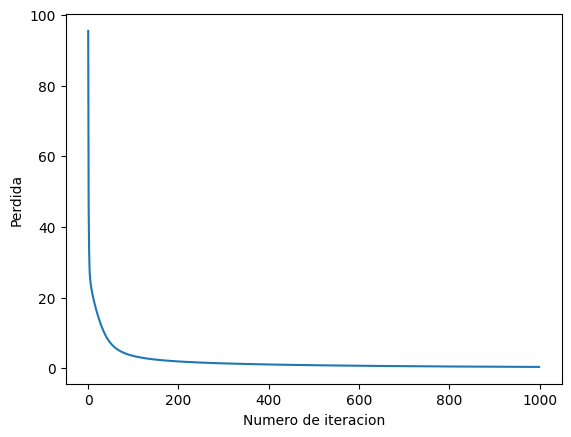

In [52]:
# Entreno el modelo
modeloMultiLog = ModeloGeneral(fMultiLog, fSquareAvgLoss, gradMultiLog)
WMultiLog, YtMultiLog = modeloMultiLog.correrModelo(X, Yj, numParam = (3,3), perdida=True)
testClasificacionMult(Yj, YtMultiLog)

El modelo logístico combinado logró clasificar bien el 100% de los datos. Usando el mismo número de iteraciones los modelos simples también quedaron muy cerca de clasificar correctamente todos los datos. Sin embargo, resulta más conveniente tener un único modelo combinado, tanto para el entrenamiento, como para la clasificación de nuevos individuos.

# Ejercicio 4

## Demostracion

Sabemos que:
$$
\sigma(x) = \frac{1}{1+e^{-x}} \\
$$
$$
\tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
$$

Queremos demostrar:
$$
    \tanh(x) = 2\sigma(2x) - 1
$$

Desarrollamos el lado derecho hasta llegar a una igualdad con el izquierdo
$$
\begin{split}
    2\sigma(2x) - 1
    &= \frac{2}{1+e^{-2x}} - 1 \\
    &= \frac{2 - (1+e^{-2x})}{1+e^{-2x}} \\
    &= \frac{1 - e^{-2x}}{1+e^{-2x}} \\
    &= \frac{e^x}{e^x} \cdot \frac{1 - e^{-2x}}{1+e^{-2x}} \\
    &= \frac{e^x - e^{-x}}{e^x+e^{-x}} \\
    &= \tanh(x) \\
    \implies \tanh(x) &= 2\sigma(2x) - 1
\end{split}
$$

## Grafica de la funcion

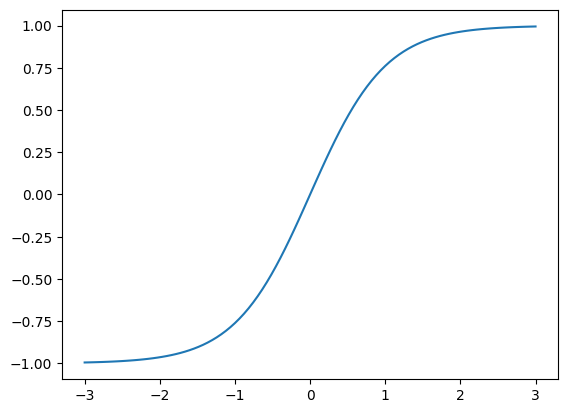

In [53]:
x = np.linspace(-3, 3, 100)
y = 2 * ModeloGeneral.sigma(2*x)-1
plt.plot(x,y)

# Ejercicio 5

## Derivada de la funcion de perdida logaritmica

La funcion de perdida es
$$
L = -\sum_{i=1}^{m} log\left|\frac{y_i}{2} - \frac{1}{2}+\hat{y_i}\right|
$$

En donde 
$$
\bar{y_i} = \sigma\left(\sum_{j=1}^n w_jx_{ij} \right)
$$
Y se sabe que $y_i \in \{-1,1\}$

Se busca hallar la derivada parcial de L con respecto a cada peso $w_j$. Para eso primero se considerará la derivada de cada término dentro de la sumatoria
$$
\frac{\partial L_i}{\partial w_j} = \frac{\partial L_i}{\partial \hat{y_i}} \frac{\partial \hat{y_i}}{\partial w_j}
$$

Se separará en dos caso: 

Cuando $\frac{y_i}{2} - \frac{1}{2}+\hat{y_i} > 0$
$$
L_i = log\left(\frac{y_i}{2} - \frac{1}{2} +\hat{y_i}\right)
$$
$$
\frac{\partial L_i}{\partial \hat{y_i}} = \frac{1}{\frac{y_i}{2} - \frac{1}{2}+\hat{y_i}} 
$$

Cuando $\frac{y_i}{2} - \frac{1}{2} + \hat{y_i}<0$
$$
L_i = log\left(- \frac{y_i}{2} + \frac{1}{2} - \hat{y_i}\right)
$$
$$
\frac{\partial L_i}{\partial \hat{y_i}} = \frac{-1}{- \frac{y_i}{2} + \frac{1}{2} - \hat{y_i}} = \frac{1}{\frac{y_i}{2} - \frac{1}{2} + \hat{y_i}}
$$

En ambos casos se obtiene lo mismo.

Ahora se calcula $\frac{\partial \hat{y_i}}{\partial w_j}$. <br>
Sea $z_i = \sum_{j=1}^n w_jx_{ij}$, entonces $y_i = \sigma(z_i)$ y la derivada parcial $\frac{\partial \hat{y_i}}{\partial z_i} = \frac{\partial \sigma(z_i)}{\partial z_i}$ ya se calculó anteriormente

$$\frac{\partial \hat{y_i}}{\partial w_j} = \frac{\partial \hat{y_i}}{\partial z_i} \frac{\partial z_i}{\partial w_j}$$
$$\frac{\partial \hat{y_i}}{\partial w_j} = \sigma(z_i)(1-\sigma(z_i)) \cdot x_{ij}$$

Por lo tanto cada término $\frac{\partial L_i}{\partial w_j}$ es de la forma:
$$
\frac{\partial L_i}{\partial w_j} = \frac{\sigma(z_i)(1-\sigma(z_i)) x_{ij}}{\frac{y_i}{2} - \frac{1}{2} + \hat{y_i}} 
$$

Y la derivada luego de considerar el signo negativo y la sumatoria de todos los terminos es
$$
\frac{\partial L}{\partial w_j} = \sum_{i=1}^{m} \frac{\sigma(z_i)(\sigma(z_i)-1) x_{ij}}{\frac{y_i}{2} - \frac{1}{2} + \hat{y_i}}
$$

El resultado en forma explicita es:
$$
\frac{\partial L}{\partial w_j} = \sum_{i=1}^{m} \frac{\sigma\left(\sum_{j=1}^n w_jx_{ij}\right)(\sigma\left(\sum_{j=1}^n w_jx_{ij}\right) - 1)}{\frac{y_i}{2} - \frac{1}{2} + \sigma\left(\sum_{j=1}^n w_jx_{ij}\right)}x_{ij}
$$

## Forma vectorial general del método del gradiente descendiente

El tensor de estímulos con todos los individuos de entrenamiento es:
$$
X = 
\begin{bmatrix}
    X_1 \\
    X_2 \\
    \vdots \\
    X_m \\
\end{bmatrix}
=
\begin{bmatrix}
    x_{11} &  x_{12} & \cdots & x_{1n}\\
    x_{21} &  x_{22} & \cdots & x_{2n}\\
    x_{m1} &  x_{m2} & \cdots & x_{mn}\\
\end{bmatrix}
$$

Donde $X_i$ es la fila del tensor que representa los atributos de un solo individuo
$$
X_i = [x_{i1}, x_{i2}, \dotsc, x_{in}]
$$

Sea W el vector de pesos
$$
W = [w_1, w_2, \dotsc, w_n]
$$

Sea Y el vector de salidas, donde cada elemento $y_i$ es la salida de un individuo $X_i$
$$
Y = [y_1, y_2, \dotsc, y_m]
$$

Usando esta notacion, la derivada de la perdida con respecto a cada peso puede expresarse como
$$
\frac{\partial L}{\partial w_j} = \sum_{i=1}^{m} \frac{\sigma(W \cdot X_i)(\sigma(W \cdot X_i) - 1)}{\frac{y_i}{2} - \frac{1}{2} + \sigma(W \cdot X_i)}x_{ij}
$$

Y se puede agrupar las derivadas con respecto a todos los pesos dentro de un solo vector que es justamente el gradiente de la función de perdida
$$
\nabla L  = \frac{\partial L}{\partial W} = \sum_{i=1}^{m} \frac{\sigma(W \cdot X_i)(\sigma(W \cdot X_i) - 1)}{\frac{y_i}{2} - \frac{1}{2} + \sigma(W \cdot X_i)}X_i
$$

Entonces la actualización de pesos en cada paso del método de gradiente descendente es de la forma:
$$
W \leftarrow W - \alpha \nabla L
$$
En donde $\alpha$ es el factor de escalamiento del paso que se da en cada iteración


## Código del modelo

In [54]:
# Funcion de perdida logaritmica
def logLoss(Y,Yt):
    return(-np.sum(np.log(np.abs(Y/2 -1/2 + Yt))))

# Gradiente de la funcion de perdida logaritmica
def gradLogLoss(X, Y, Yt, W):
    # Se calculan derivadas parciales de los pesos
    Z = np.matmul(W, X)
    dLYt = 1/(Y/2 - 1/2 + Yt)
    dYtZ = ModeloGeneral.sigma(Z) * (1 - ModeloGeneral.sigma(Z))
    dLW = np.ones(len(W))
    for i in range(len(W)):
        dLW[i] = -sum( dLYt * dYtZ * X[i]) 
    return dLW

# Evalua la clasificacion realizada por el modelo con funcion de perdida logaritmica
def testLogLoss(Y, Yt):
    Yt = np.round(Yt)
    Yt[Yt == 0] = -1
    correctos = np.sum(Y == Yt)
    porcentaje = np.round(correctos / len(Y) * 100, 2)
    print(f'Se clasificaron bien {correctos} de las {len(Y)} instancias')
    print(f'Porcentaje de instancias bien clasificadas: {porcentaje}%\n')
    
modeloLog = ModeloGeneral(fLog, ModeloGeneral.squareLoss, gradLog)
    

Parametros obtenidos en el modelo Log Loss [-0.30285143 -0.56581021 -1.98586646  3.04914679  1.39845721]
Se clasificaron bien 100 de las 100 instancias
Porcentaje de instancias bien clasificadas: 100.0%



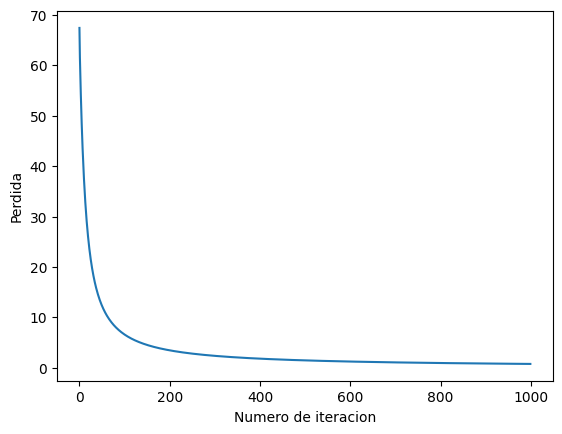

In [55]:
# Cargo los datos
dataIris2 = pd.read_csv("./data/iris2.csv")
X = np.ones((5, len(dataIris2)))
X[1] = dataIris2["SepalLength"]
X[2] = dataIris2["SepalWidth"]
X[3] = dataIris2["PetalLength"]
X[4] = dataIris2["PetalWidth"]
labels = dataIris2["Species"]

Y = np.ones((len(dataIris2)))
Y[labels=="setosa"] = -1

# Creo el modelo y lo corro
modeloLogLoss = ModeloGeneral(fLog, logLoss, gradLogLoss)
W, Yt = modeloLogLoss.correrModelo(X, Y, 5, nmax = 1000, step=10**-3, perdida=True)
print(f'Parametros obtenidos en el modelo Log Loss {W}')
testLogLoss(Y, Yt)

# Ejercicio 6

## Vectores de labels Yk

In [56]:
# Cargo los datos
dataIris = pd.read_csv("./data/iris.csv")
X = np.ones((5, len(dataIris)))
X[1] = dataIris["Sepal.Length"]
X[2] = dataIris["Sepal.Width"]
X[3] = dataIris["Petal.Length"]
X[4] = dataIris["Petal.Width"]
labels = dataIris["Species"]
n = len(dataIris)

# Construyo los vectores Yk
Y1 = np.ones(n)
Y1[labels!="setosa"] = -1
Y2 = np.ones(n)
Y2[labels!="versicolor"] = -1
Y3 = np.ones(n)
Y3[labels!="virginica"] = -1

## Modelos Logisticos Log Loss

In [57]:
# Calculo los pesos de los tres modelos logisticos
W1, Yt1 = modeloLogLoss.correrModelo(X, Y1, 5, nmax = 2000)
W2, Yt2 = modeloLogLoss.correrModelo(X, Y2, 5, nmax = 2000, step = 10**-3)
W3, Yt3 = modeloLogLoss.correrModelo(X, Y3, 5, nmax = 2000, step = 10**-4)

## Clasificador 

In [58]:
# Clasifico de acuerdo al que arroje mayor Yt
Yt = np.argmax([Yt1, Yt2, Yt3], axis=0)

# Paso a labels y comparo con las originales
YtLabels = np.array(["longString"] * n)
YtLabels[Yt == 0] = "setosa"
YtLabels[Yt == 1] = "versicolor"
YtLabels[Yt == 2] = "virginica"
porcentaje = np.round(np.sum(YtLabels == labels)/n * 100, 2)

print(f'Argmax clasifico correctamente el {porcentaje}% de los datos de Iris')


Argmax clasifico correctamente el 98.0% de los datos de Iris


# Ejercicio 7

## Grafico

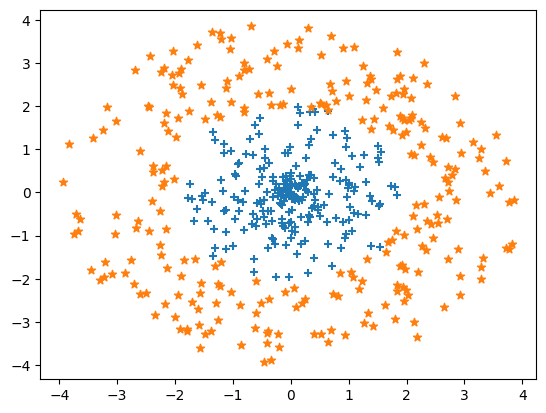

In [59]:
# Cargo los datos
dataPlano = pd.read_csv("./data/plano.csv")
m = len(dataPlano)
X = np.ones((2, m))
X[0] = dataPlano["x"]
X[1] = dataPlano["y"]

# Pongo los labels y genero el grafico
circleIn = np.array(X[0]**2 + X[1]**2<=4)
circleOut = np.logical_not(circleIn)

Ylab = np.array(["circleOut"] * m)
Ylab[circleIn] = "circleIn"

markers = np.array(["*"] * m)
markers[circleIn] = "+"

plt.scatter(X[0][circleIn], X[1][circleIn], marker="+")
plt.scatter(X[0][circleOut], X[1][circleOut], marker="*")

## Modelo Logistico

In [60]:
# Creo labels numericas para alimentar el modelo
Y = np.ones(m)
Y[circleOut] = 0

# Calculo los pesos del modelo
W, Yt = modeloLog.correrModelo(X, Y, 2, nmax=10000)
testClasificacion(Y, Yt)

Se clasificaron bien 272 de las 500 instancias
Porcentaje de instancias bien clasificadas: 54.4%



## Generacion de datos aleatorios

In [61]:
nrand = 100
Xrand = np.random.uniform(low=-5 , high=5 , size=(2, nrand))

## Clasificacion de datos aleatorios

Se clasificaron bien 52 de las 100 instancias
Porcentaje de instancias bien clasificadas: 52.0%



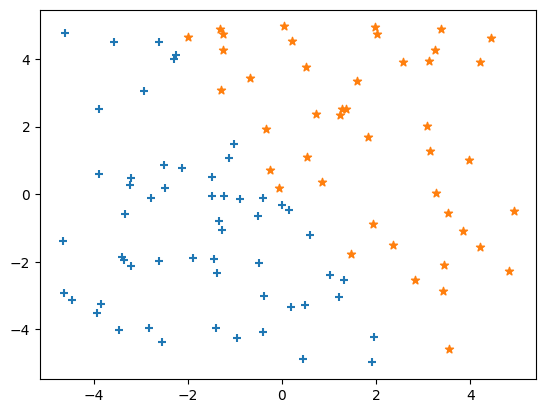

In [62]:
# Genero el grafico de la clasificacion del modelo
YtRand = modeloLog.clasificar(Xrand, W)
circleInRand = (YtRand == 1)
circleOutRand = (YtRand == 0)
markers = np.array(["*"] * nrand)
markers[circleInRand] = "+"

plt.scatter(Xrand[0][circleInRand], Xrand[1][circleInRand], marker="+")
plt.scatter(Xrand[0][circleOutRand], Xrand[1][circleOutRand], marker="*")

# Evaluo los resultados generando la label que debió salir
Yrand = np.array(Xrand[0]**2 + Xrand[1]**2<=4)
testClasificacion(Yrand, YtRand)

El modelo no pudo predecir de manera satisfactoria si los puntos aleatorios están dentro del círculo. La razón de esto es que los inputs que se le entregó son insuficientes, además del hecho de que es un modelo de una sola neurona. Esto provoca que el modelo solo pueda generar una frontera de clasificación lineal, mientras que los datos siguen un patrón no lineal.

# Ejercicio 8

## Genero las nuevas columnas

In [63]:
dataPlano = pd.read_csv("./data/plano.csv")
m = len(dataPlano)
X = np.ones((5, m))
X[0] = dataPlano["x"]
X[1] = dataPlano["y"]
X[2] = X[0] ** 2
X[3] = X[1] ** 2
X[4] = X[0] * X[1]

In [40]:
print(X)

[[-5.92142063e-02 -5.58537258e-01  3.59961185e+00 ... -2.01860559e-03
  -9.73561979e-01 -7.67095402e-01]
 [ 3.43360269e+00  2.28829675e+00  1.43660081e-01 ... -6.91761410e-01
  -9.78982160e-02  8.82260170e-01]
 [ 3.50632223e-03  3.11963869e-01  1.29572055e+01 ...  4.07476851e-06
   9.47822927e-01  5.88435355e-01]
 [ 1.17896274e+01  5.23630203e+00  2.06382189e-02 ...  4.78533848e-01
   9.58406070e-03  7.78383008e-01]
 [-2.03318058e-01 -1.27809899e+00  5.17120531e-01 ...  1.39639345e-03
   9.53099809e-02 -6.76777720e-01]]


## Modelo Logistico

In [64]:
# Creo labels numericas para alimentar el modelo
Y = np.ones(m)
Y[circleOut] = 0

# Calculo los pesos del modelo
W, Yt = modeloLog.correrModelo(X, Y, 5, nmax=12000, step = 0.01)
testClasificacion(Y, Yt)

Se clasificaron bien 379 de las 500 instancias
Porcentaje de instancias bien clasificadas: 75.8%



## Generacion de datos aleatorios

In [65]:
nrand = 100
Xrand = np.zeros((5,nrand))
Xrand[0] = np.random.uniform(low=-5 , high=5, size=nrand)
Xrand[1] = np.random.uniform(low=-5 , high=5, size=nrand)
Xrand[2] = Xrand[0] ** 2
Xrand[3] = Xrand[1] ** 2
Xrand[4] = Xrand[0] * Xrand[1]

## Clasificacion de datos aleatorios

Se clasificaron bien 90 de las 100 instancias
Porcentaje de instancias bien clasificadas: 90.0%



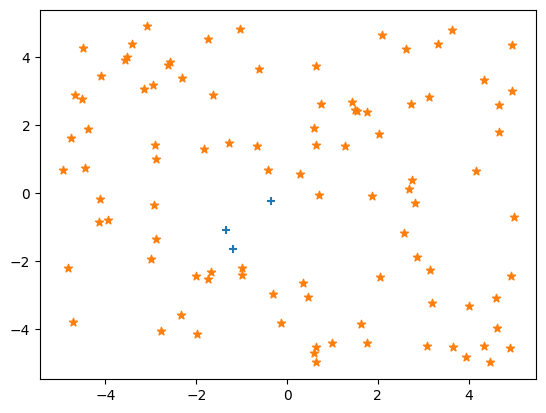

In [66]:
# Genero el grafico de la clasificacion del modelo
YtRand = modeloLog.clasificar(Xrand, W)
circleInRand = (YtRand == 1)
circleOutRand = (YtRand == 0)
markers = np.array(["*"] * nrand)
markers[circleInRand] = "+"

plt.scatter(Xrand[0][circleInRand], Xrand[1][circleInRand], marker="+")
plt.scatter(Xrand[0][circleOutRand], Xrand[1][circleOutRand], marker="*")

# Evaluo los resultados generando la label que debió salir
Yrand = np.array(Xrand[0]**2 + Xrand[1]**2<=4)
testClasificacion(Yrand, YtRand)

Al entregar más información en forma de inputs el modelo es capáz de identificar una región de separación que se acerca más al círculo original. Por esa razón se obtienen mejores predicciones sobre los puntos generados aleatoriamentes